In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adtk.data import validate_series
from adtk.visualization import plot as ad_plot
from adtk.detector import PersistAD

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]


#import series, add datetimeindex

df=pd.read_csv('LFC Bad data/LFC_Bad_3.csv')
dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
df.set_index(dti, inplace=True)
df=validate_series(df)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

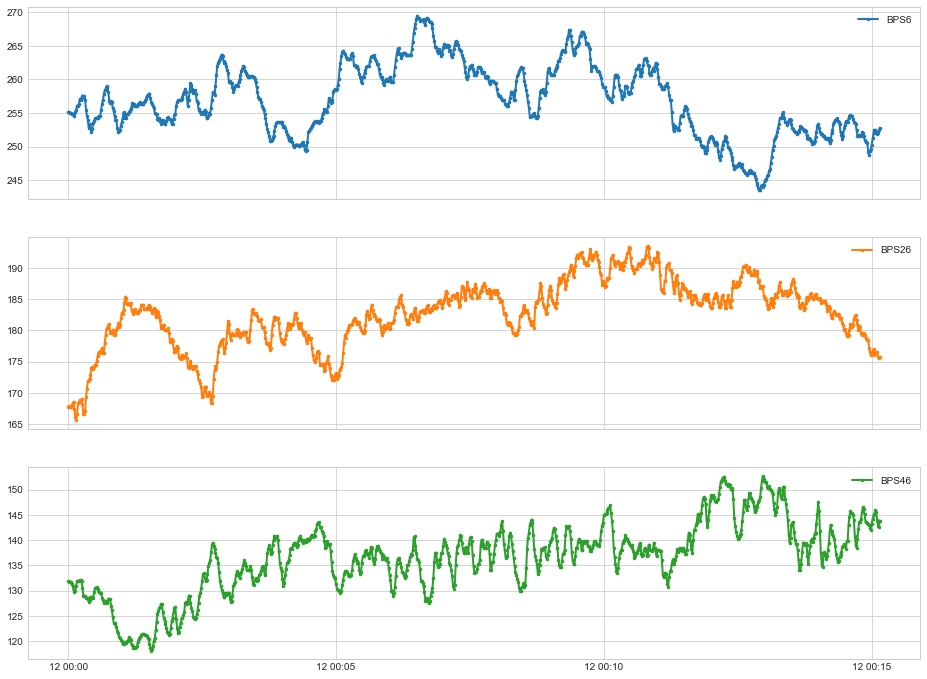

In [2]:
ad_plot(df[triads[5]],ts_linewidth=2, ts_markersize=5)

In [3]:
#func to cgange datetimeindex to normal_index
def add_index(a):
    a.reset_index()
    indices=[]
    for i in range(len(a.index)):
        secs= str(a.index[i])[-2:]
        mins= str(a.index[i])[-5:-3]
        num= (int(mins)*60)+ int(secs)
        indices.append(num)
    a['index']= indices
    temp=list(a.columns)[:-1]
    temp.insert(0,'index')
    a=a[temp]
    a.reset_index(drop=True, inplace=True)
    a.set_index('index', drop=True, inplace=True)
    return a

In [4]:
def persist(path, w=5, c=0.5, start=0, end=20):
    df=pd.read_csv(path)
    dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
    df.set_index(dti, inplace=True)
    df=validate_series(df)
    
    persist_ad = PersistAD(c=c, side='negative')
    persist_ad.window = w
    
    c_result= []
    c_anomalies=[]
    for curr in triads[start:end]:
        s=df[curr]
        anomalies = persist_ad.fit_detect(s)
        c_anomalies.append(anomalies)
        a=anomalies.loc[anomalies.all(axis='columns', skipna=True) == True][1:]
        #return list of numeric indices
        result_set=list(add_index(a).index)
        init_list_rem= [i for i in range(1,w+1)]
        result_set=list(set(result_set)-set(init_list_rem))
        result_set.sort()
        c_result.append(result_set)
        print(curr[0] + '+' + curr[1] + '+' + curr[2] + ' = ' + str(result_set))
    return c_result, c_anomalies, df

In [5]:
def plot_lfc_count(c_result):
    len_c=[]
    for i in range(len(c_result)):
                   len_c.append(len(c_result[i]))
    tri= ['Tr. '+ str(i) for i in range(1,21)]
    fig = plt.figure(figsize = (25, 5))
    plt.bar(tri, len_c, color ='red',width = 0.4)

BPS1+BPS21+BPS41 = [94, 161, 269, 270, 446, 579]
BPS2+BPS22+BPS42 = [269, 270]
BPS3+BPS23+BPS43 = []
BPS4+BPS24+BPS44 = []
BPS5+BPS25+BPS45 = []
BPS6+BPS26+BPS46 = []
BPS7+BPS27+BPS47 = []
BPS8+BPS28+BPS48 = []
BPS9+BPS29+BPS49 = [223, 224, 225, 643, 644, 645, 743, 744]
BPS10+BPS30+BPS50 = []
BPS11+BPS31+BPS51 = [244, 408, 520]
BPS12+BPS32+BPS52 = [51, 52, 73, 122, 123, 163, 201, 202, 408, 434, 521]
BPS13+BPS33+BPS53 = []
BPS14+BPS34+BPS54 = [154]
BPS15+BPS35+BPS55 = [75, 378]
BPS16+BPS36+BPS56 = []
BPS17+BPS37+BPS57 = [59]
BPS18+BPS38+BPS58 = []
BPS19+BPS39+BPS59 = []
BPS20+BPS40+BPS60 = []


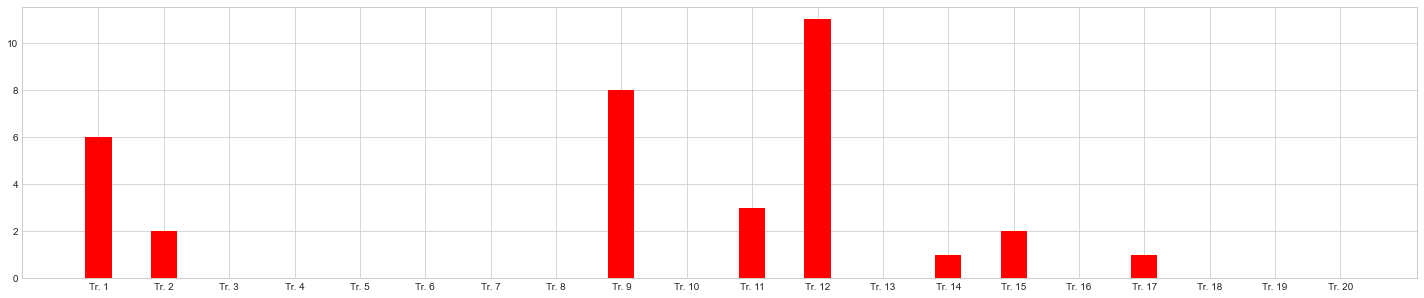

In [12]:
c_result, c_anomalies, df= persist(path= 'LFC Bad data/LFC_Bad_3.csv')
plot_lfc_count(c_result)

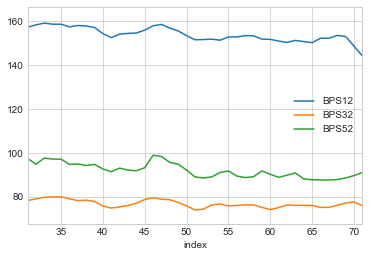

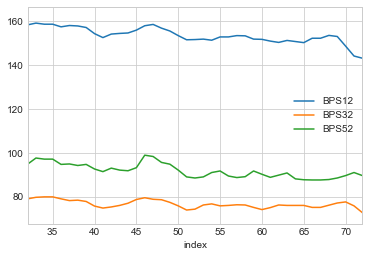

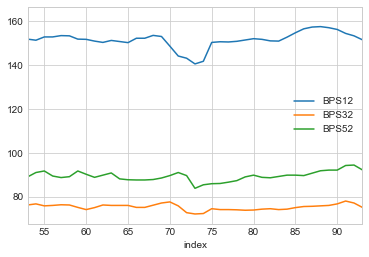

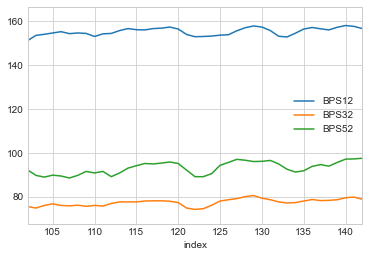

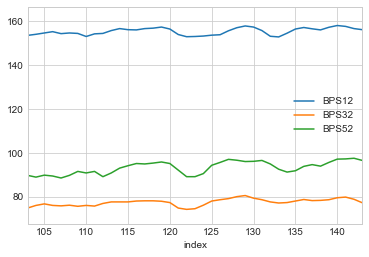

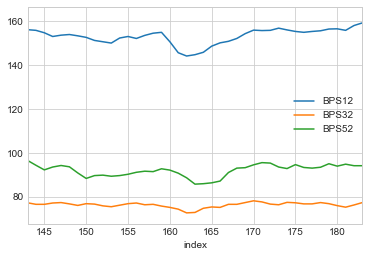

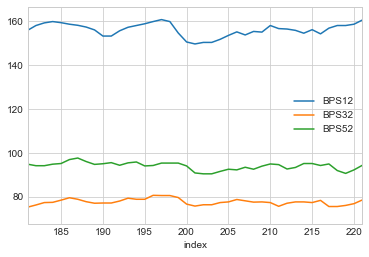

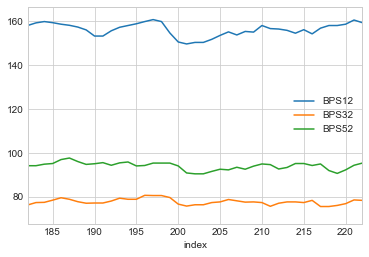

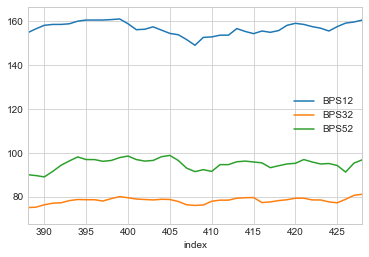

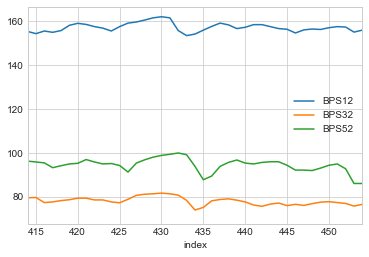

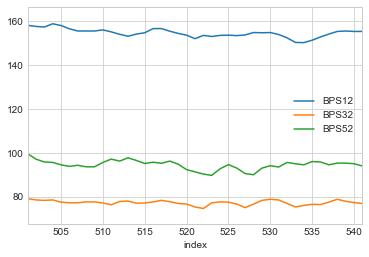

In [13]:
tno=12
df_temp=add_index(df)
for i in c_result[tno-1]:
    df_temp[triads[tno-1]].plot(xlim=[i-20,i+20])

BPS1+BPS21+BPS41 = [373]
BPS2+BPS22+BPS42 = [988]
BPS3+BPS23+BPS43 = []
BPS4+BPS24+BPS44 = []
BPS5+BPS25+BPS45 = [469, 470]
BPS6+BPS26+BPS46 = []
BPS7+BPS27+BPS47 = []
BPS8+BPS28+BPS48 = [392]
BPS9+BPS29+BPS49 = [382, 532, 533, 584]
BPS10+BPS30+BPS50 = []
BPS11+BPS31+BPS51 = [261]
BPS12+BPS32+BPS52 = []
BPS13+BPS33+BPS53 = []
BPS14+BPS34+BPS54 = []
BPS15+BPS35+BPS55 = []
BPS16+BPS36+BPS56 = []
BPS17+BPS37+BPS57 = [314, 754, 912]
BPS18+BPS38+BPS58 = []
BPS19+BPS39+BPS59 = []
BPS20+BPS40+BPS60 = [991]


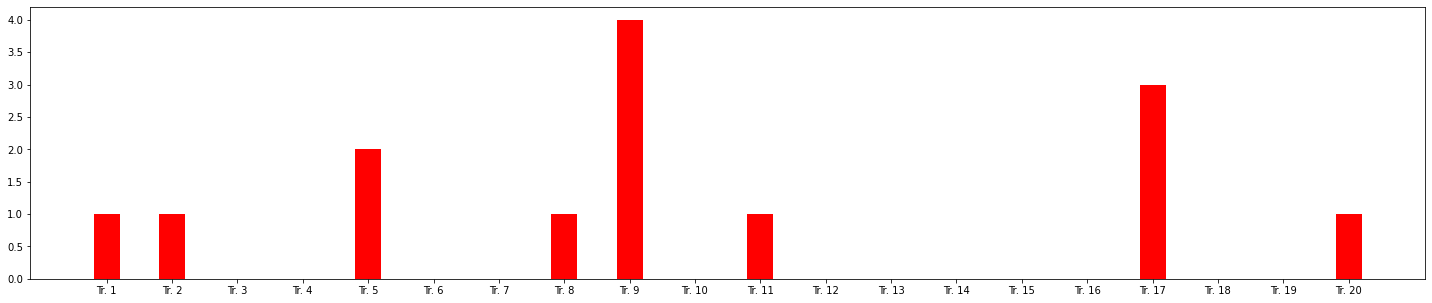

In [6]:
c_result, c_anomalies, df= persist(path= 'LFC Bad data/LFC_Bad_4.csv')
plot_lfc_count(c_result)

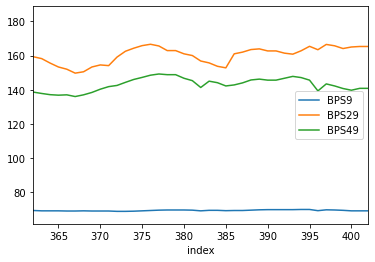

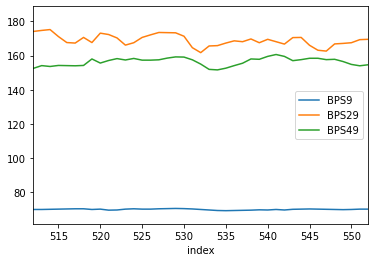

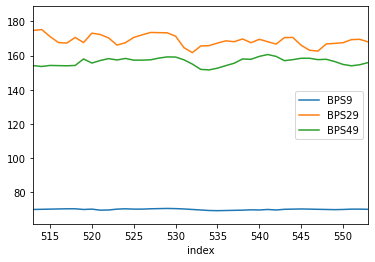

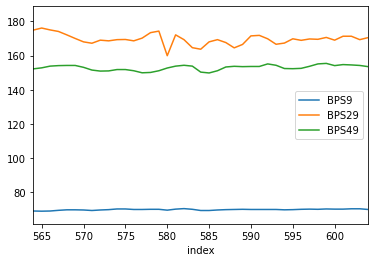

In [8]:
tno=9
df_temp=add_index(df)
for i in c_result[tno-1]:
    df_temp[triads[tno-1]].plot(xlim=[i-20,i+20])

BPS1+BPS21+BPS41 = [439, 440]
BPS2+BPS22+BPS42 = []
BPS3+BPS23+BPS43 = [205, 487]
BPS4+BPS24+BPS44 = []
BPS5+BPS25+BPS45 = []
BPS6+BPS26+BPS46 = [407, 495]
BPS7+BPS27+BPS47 = [512, 533]
BPS8+BPS28+BPS48 = []
BPS9+BPS29+BPS49 = []
BPS10+BPS30+BPS50 = []
BPS11+BPS31+BPS51 = [129, 628, 629, 630]
BPS12+BPS32+BPS52 = [380]
BPS13+BPS33+BPS53 = []
BPS14+BPS34+BPS54 = []
BPS15+BPS35+BPS55 = []
BPS16+BPS36+BPS56 = [349, 350, 351, 352, 353, 401, 446]
BPS17+BPS37+BPS57 = [565, 566, 567]
BPS18+BPS38+BPS58 = [620]
BPS19+BPS39+BPS59 = []
BPS20+BPS40+BPS60 = [206]


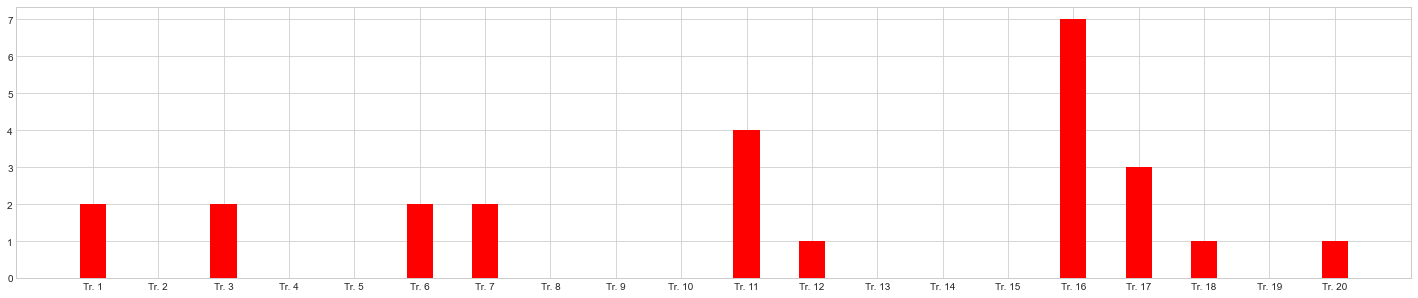

In [44]:
c_result, c_anomalies, df= persist(path='Data/15_Feb_C1_Bad_Case_8am.csv', c=0.6, w=10)
plot_lfc_count(c_result)

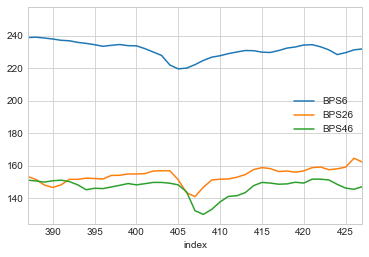

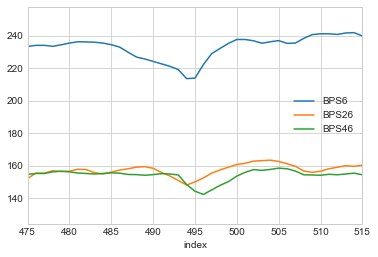

In [49]:
tno=6
df_temp=add_index(df)
for i in c_result[tno-1]:
    df_temp[triads[tno-1]].plot(xlim=[i-20,i+20])